<a id = "head"></a>
# <p style="text-align: center;">Прогнозирование оттока клинетов сети фитнес-центров «Культурист-датасаентист»</p>
---

### Описание проекта
---

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Необходимо провести анализ собранных данных и подготовить план действий по удержанию клиентов. 
А именно: 
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

### Описание данных 
---

**Набор данных включает следующие поля:** 

- 'Churn' — факт оттока в текущем месяце;

**Текущие поля в датасете:**

*Данные пользователя за предыдущий до проверки факта оттока месяц:*
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента*
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

### План выполнения проекта:
***

1. [Изучение общей информации о данных](#step1)
2. [Исследовательский анализ данных (EDA)](#step2)
3. [Построение модели прогнозирования оттока пользователей](#step3)
4. [Кластеризация пользователей](#step4)
5. [Общий вывод по проекту](#step5)

<a id = "step1"></a>
## Шаг 1. Изучение общей информации о данных
---
[2](#step2)  [3](#step3)   [4](#step4)   [5](#step5)   [Начало](#head)

In [1]:
# Импорт библиотек:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
gym = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\gym_churn.csv')

In [3]:
gym.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1446,1,1,0,0,1,1,1,33,181.619896,1.0,4,1.969723,2.288495,0
3608,0,1,0,0,0,1,1,28,96.075599,1.0,1,0.751725,0.000000,1
329,1,1,0,0,1,1,1,27,133.570180,1.0,2,3.102029,3.161236,0
1721,0,1,0,0,1,1,0,32,214.329541,1.0,0,1.675674,1.694059,0
3956,0,1,0,0,1,1,1,34,400.004760,1.0,5,1.295159,1.392138,0
1507,1,1,1,0,1,1,0,30,306.120514,1.0,5,1.504493,1.437735,0
2710,0,1,1,0,1,1,0,22,28.964286,1.0,1,1.081582,0.000000,1
3946,0,1,0,1,0,1,0,30,43.591497,1.0,1,3.634475,3.641853,0
583,0,1,1,0,1,12,0,35,101.426505,11.0,4,1.137812,1.089846,0
2573,0,1,0,0,1,1,0,28,71.123606,1.0,1,1.461707,0.081210,1


In [4]:
gym.shape

(4000, 14)

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
gym.duplicated().sum()

0

---
Данные полностью готовы к анализу. Пропуски и дубликаты отсутствуют. Типы данных всех переменных корректные. 

<a id = "step2"></a>
## Шаг 2. Исследовательский анализ данных (EDA)
---
[1](#step1)  [3](#step3)   [4](#step4)   [5](#step5)   [Начало](#head)

In [7]:
columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Month_to_end_contract', 'Group_visits', 'Age', 'Lifetime', 'Churn']

In [8]:
gym[1] = 1

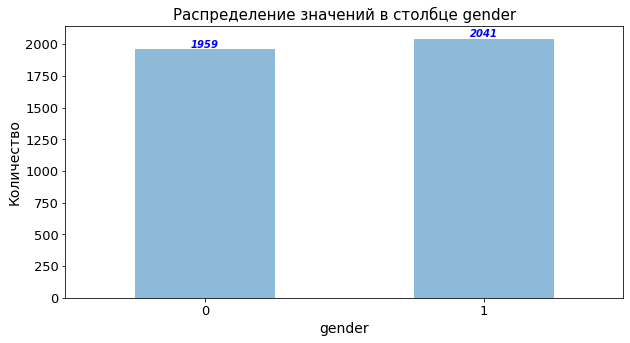

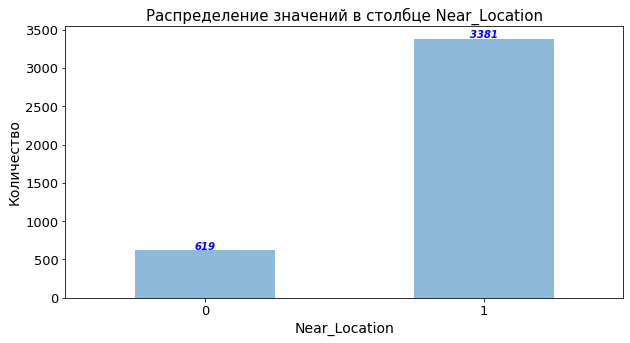

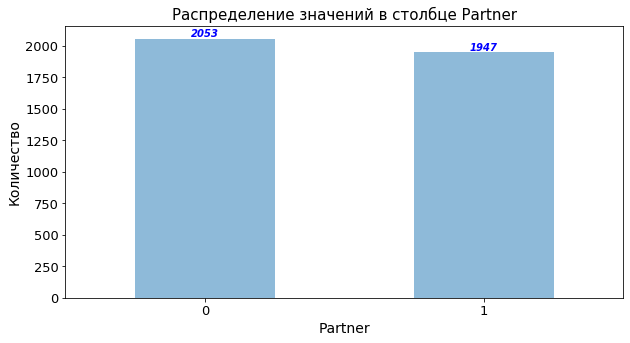

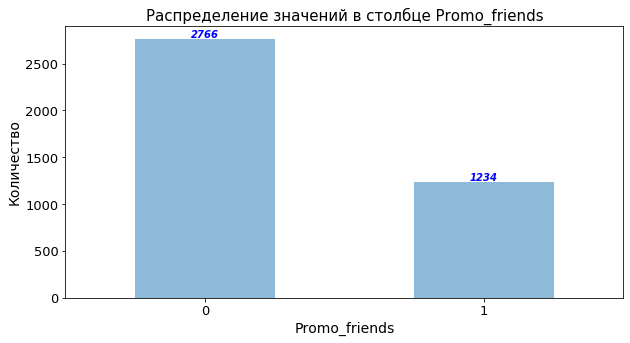

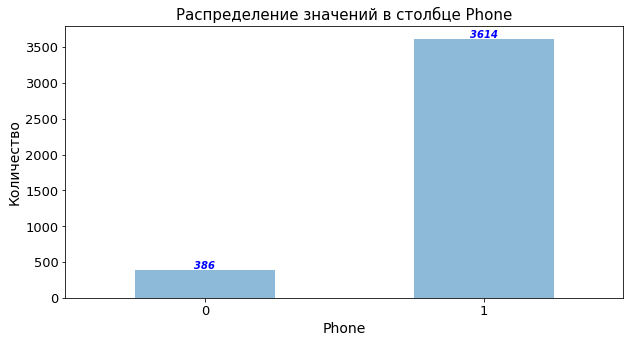

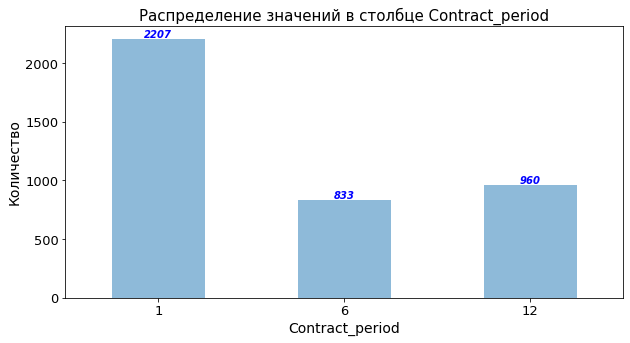

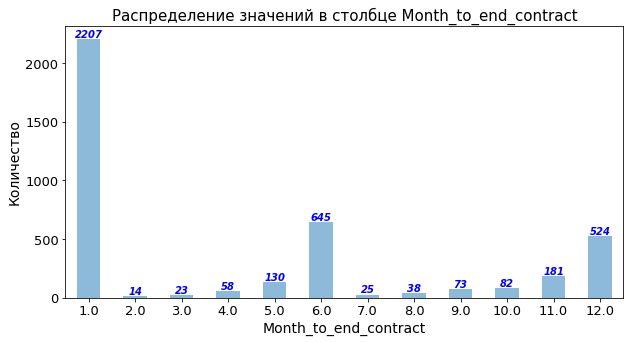

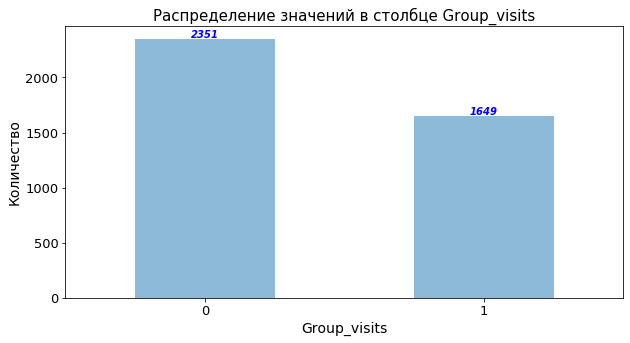

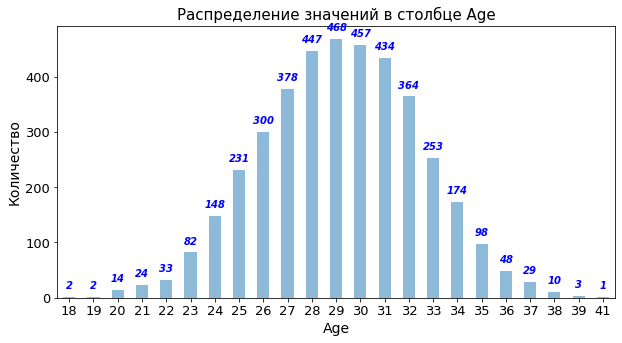

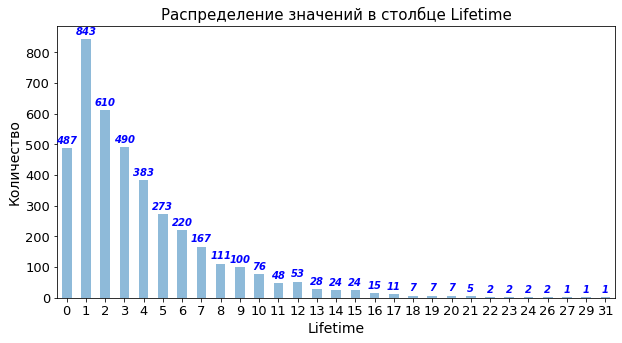

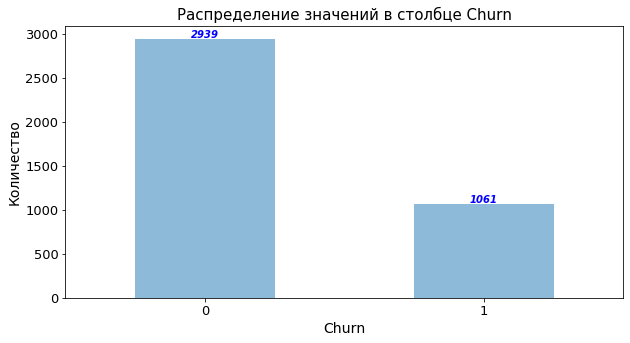

In [9]:
for i in columns:
    #print('Столбец', i)
    grouped = gym.groupby(i)[1].count()
    grouped.plot(kind='bar', alpha = 0.5, figsize = (10,5))
    plt.title('Распределение значений в столбце ' + i, fontsize = 15)
    plt.xticks(fontsize=13, rotation = 360)
    plt.yticks(fontsize=13)
    plt.ylabel('Количество', fontsize = 14)
    plt.xlabel(i ,fontsize = 14)
    for j, count in enumerate(grouped):
        plt.text(j, count+15, count, horizontalalignment='center', 
                 fontsize = 10, color = 'b', fontweight = 'bold', fontstyle='italic')

    plt.show()
    print()

---
Количество мужчин и женщин распределено практически одинаково. Большинство клиентов проживает или работает рядом с фитнес-центром. Практически половина занимающихся является сотрудниками компаний-партнёров клуба. Около 10% клиентов предпочли не сообщать номер своего мобильного телефона. 

Большинство заключило контаркт с фитнес-центром на 1 месяц. Посетители клуба - это люди в возрасте от 18 до 41 года. Возраст клиентов имеет нормальное распределение. Судя по значениям в столбце Lifetime большинство клиентов новые. 
Что касается оттока, то в текущем месяце выбыло 26,5% клиентов. 

In [10]:
columns1 = ['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

---------- Описательная статистика для столбца Avg_additional_charges_total ----------

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: Avg_additional_charges_total, dtype: float64



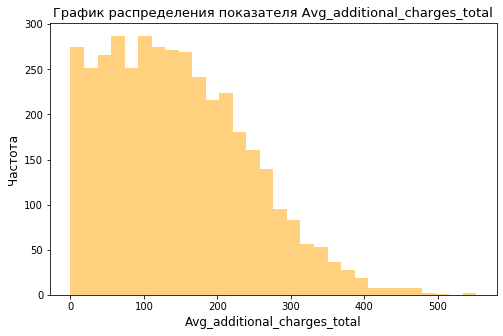

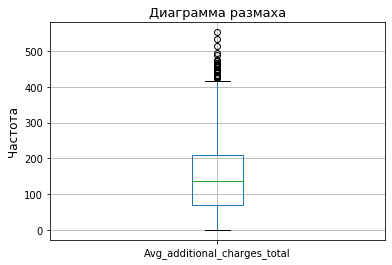


---------- Описательная статистика для столбца Avg_class_frequency_total ----------

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: Avg_class_frequency_total, dtype: float64



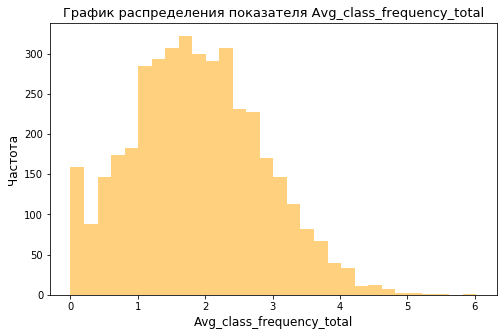

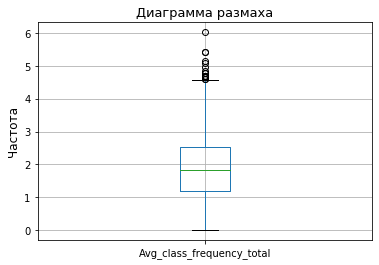


---------- Описательная статистика для столбца Avg_class_frequency_current_month ----------

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: Avg_class_frequency_current_month, dtype: float64



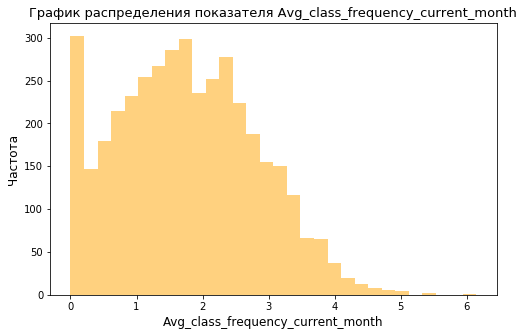

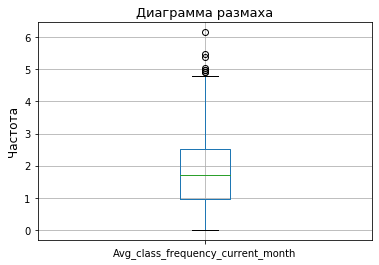

In [11]:
for i in columns1:
    
    print('-'*10, colored('Описательная статистика для столбца ' + i, "blue", attrs=["bold"]), '-'*10)
        
    print()
    print(gym[i].describe())
    print()
    gym[i].plot(kind='hist', alpha=0.5, bins=30, color = 'orange', figsize = (8,5))
    plt.title('График распределения показателя ' + i, fontsize = 13)
    plt.ylabel('Частота', fontsize = 12)
    plt.xlabel(i ,fontsize = 12)
    plt.show()
    
    gym[[i]].boxplot(column = i)
    plt.title('Диаграмма размаха', fontsize = 13)
    plt.ylabel('Частота', fontsize = 12)
    plt.show()
    print()

---
**В среднем клиенты фитнес-центра потратили дополнительно около 147 у.е. Средние показатели посещаемости за предыдущий месяц ниже, чем значения за все время с начала действия абонемента.**

In [12]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,1
Churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,1.0
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0


<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Классно, что оценил значения признаков по целевому параметру - уже можно сделать интерсные выводы</div>   

На основе получившейся таблицы можно предположить, что на отток влияют следующие показатели: 
- является ли клинент сотрудником компании-партнёра клуба; 
- факт первоначальной записи в рамках акции «приведи друга»;
- длительность абонемента;
- факт посещения групповых тренировок;
- срок до окончания текущего действующего абонемента;
- время с момента первого обращения в фитнес-центр;
- Частота посещений.

Стоит отметить, что попавшие в отток в среднем моложе, меньше тратили на дополнительные услуги и реже посещали клуб. Они были новыми клиентами и изначально брали абонементы на небольшой срок. 

--- 
Не наблюдается связь между оттоком и такими показателями как пол, факт проживания или работа в районе, где находится фитнес-центр, а также наличие контактного телефона в базе клуба. 


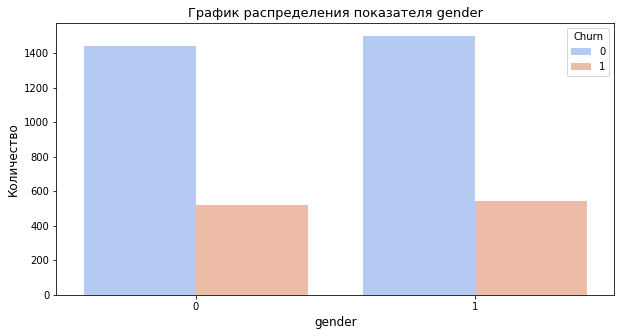

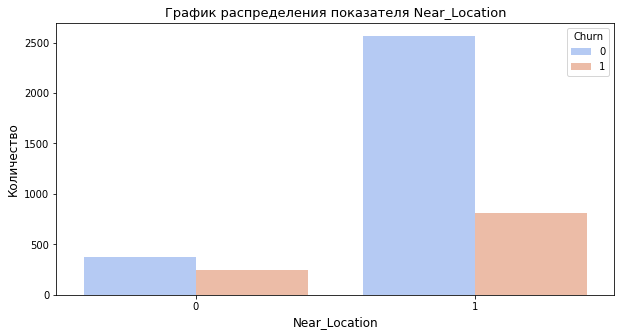

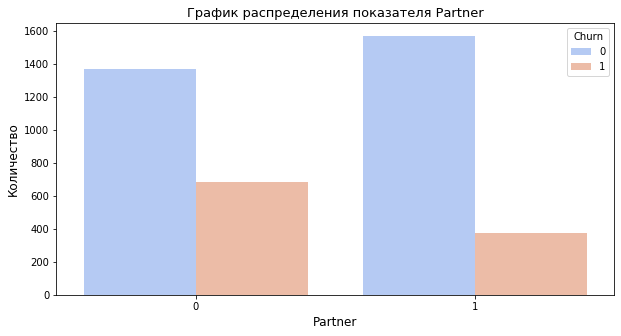

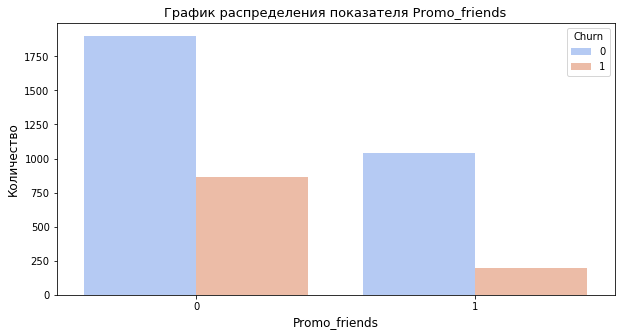

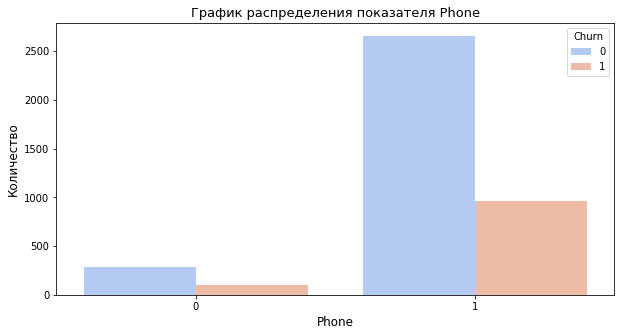

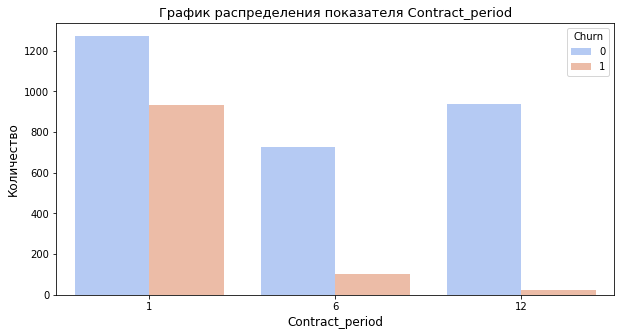

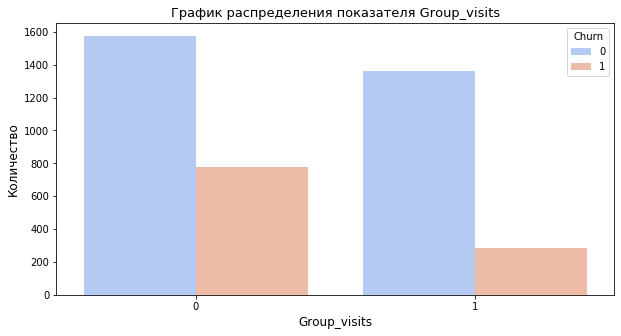

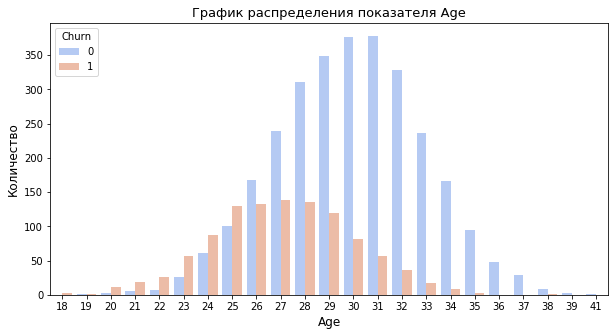

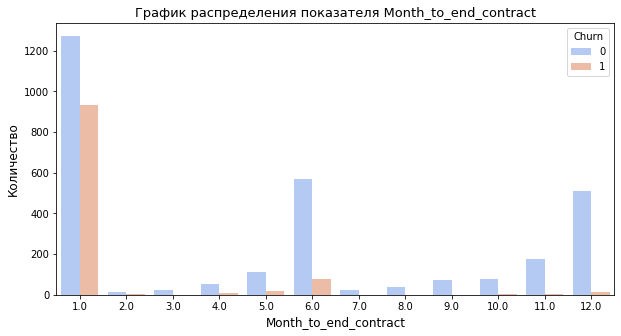

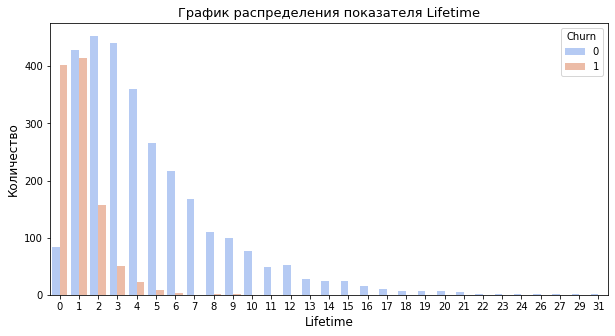

In [13]:
left = gym[gym['Churn'] == 1]
stayed = gym[gym['Churn'] == 0]
for i in gym.drop(['Churn',1], axis = 1).columns:
    if i not in columns1: 
        
        plt.figure(figsize=(10, 5))
        
        sns.countplot(x=i, hue="Churn", palette="coolwarm", data=gym)
        
        plt.title('График распределения показателя ' + i, fontsize = 13)
        plt.ylabel('Количество', fontsize = 12)
        plt.xlabel(i ,fontsize = 12)
        
        plt.show()

---
На графиках видно, что клиенты, покинувшие фитнес-центр в текущем месяце, в среднем посещали его от 1 до 2 месяцев, а также покупали абонемент сроком на 1 месяц. 

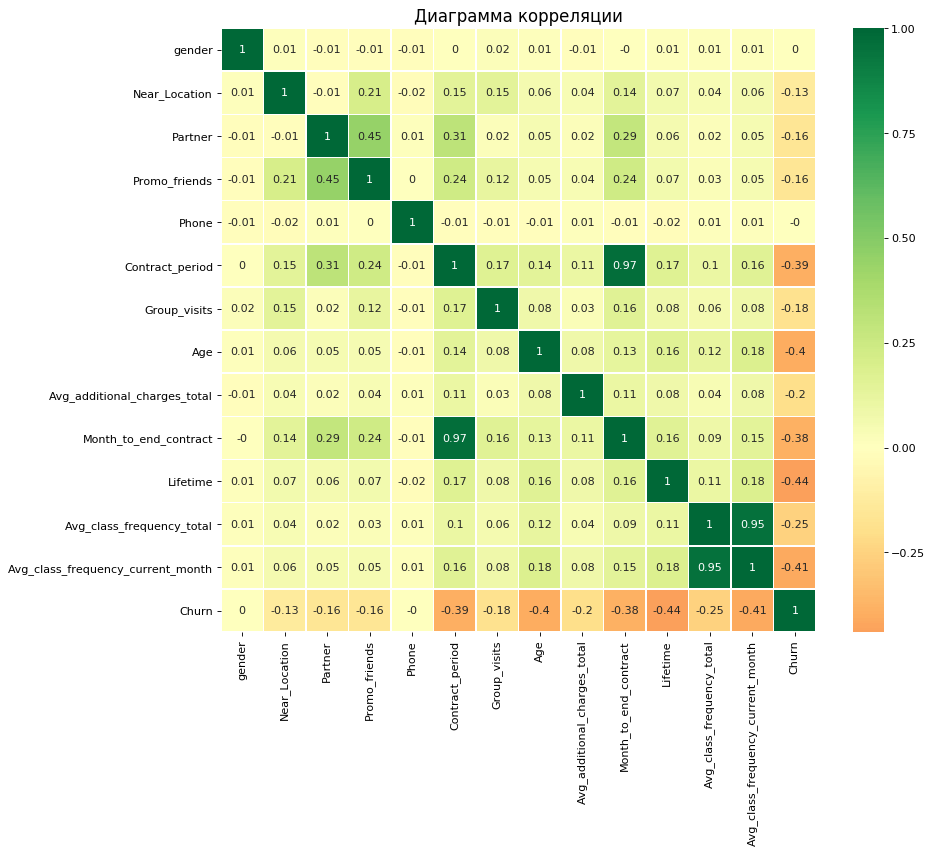

In [14]:
heat = gym.drop(1, axis = 1)
plt.figure(figsize=(12,10), dpi= 80)
plt.title('Диаграмма корреляции', fontsize = 15)
sns.heatmap(round(heat.corr(),2), xticklabels=heat.corr().columns, 
            yticklabels=heat.corr().columns, linewidths=.5,
            cmap='RdYlGn', center=0, annot=True);

---
Обнаружили две пары скореллированных принзаков: 
1. `Avg_class_frequency_total` и `Avg_class_frequency_current_month`;
2. `Month_to_end_contract` и `Contract_period`.

**Чтобы в дальшейм избежать мультиколлинеарности удалим по одному из скоррелированных признаков в каждой паре:**

In [15]:
# для проверки
gym_copy = gym.copy(deep=True)

In [16]:
gym.drop(['Avg_class_frequency_current_month', 'Contract_period', 1], axis = 1, inplace = True)

In [17]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.020398,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.922936,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.205633,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,0


<a id = "step3"></a>
## Шаг 3. Построение модели прогнозирования оттока пользователей
---
[1](#step1)  [2](#step2)   [4](#step4)   [5](#step5)   [Начало](#head)

**Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:**

In [18]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

In [19]:
# разделим модель на обучающую и валидационную выборку:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# Подготовим функцию, которая будет выводить нужные метрики:
def print_all_metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# 1)Обучение модели методом логистической регрессией:
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
# выведем все метрики
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')
print()
#2)Обучение модели методом случайного леса:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
# выведем все метрики
print_all_metrics(y_test, rf_predictions, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.88
	Precision: 0.76
	Recall: 0.77

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.77


---
Мы обучили модель бинарной классификации двумя способами: логистической регрессией и случайным лесом. 
Доля правильных ответов у полученных моделей доволно высокая. Логистическая регрессия дает 88% правильных ответов, а модель случайного леса - 90%. Точность полученных моделей тоже на хорошем уровне. Доля прогнозов среди целевого класса в модели случайного леса выше: 80% против 76%. Показатель полноты для обеих моделей одинаковый. Это значит, что они смогли обнаружить одинаковое количество реальных объектов целевого класса.
На основании полученных метрик модель случайного леса в целом показала себя лучше. 

In [21]:
# Стандартизируем данные:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)


# 1)Модель методом логистической регрессией:
lr_model_st = LogisticRegression()
# обучим модель на стандартизированных данных
lr_model_st.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model_st.predict(X_test_st)

# выведем все метрики
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')
print()

#2)Модель случайного леса:
rf_model_st = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель на стандартизирвоанных данных
rf_model_st.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model_st.predict(X_test_st)

# выведем все метрики
print_all_metrics(y_test, rf_predictions, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.77


In [22]:
df_lr = pd.DataFrame(data ={'feature': X.columns, 
                            'importance': lr_model_st.coef_.ravel()})\
                            .sort_values('importance', ascending = True)

In [23]:
df_lr

,feature,importance
9,Lifetime,-3.788097
8,Month_to_end_contract,-1.277276
6,Age,-1.081770
10,Avg_class_frequency_total,-0.726038
7,Avg_additional_charges_total,-0.555945
5,Group_visits,-0.357375
3,Promo_friends,-0.206970
4,Phone,-0.115276
1,Near_Location,-0.093083
2,Partner,-0.067187


In [24]:
lr_model_st.intercept_ 

array([-3.49555008])

In [25]:
df_rf = pd.DataFrame(data ={'feature': X.columns, 
                            'importance': rf_model_st.feature_importances_})\
                            .sort_values('importance', ascending = False)

In [26]:
df_rf.assign(importance_cumsum = lambda row: row['importance'].cumsum())

,feature,importance,importance_cumsum
9,Lifetime,0.331463,0.331463
10,Avg_class_frequency_total,0.167433,0.498896
6,Age,0.148635,0.647531
7,Avg_additional_charges_total,0.133853,0.781384
8,Month_to_end_contract,0.123290,0.904674
5,Group_visits,0.021375,0.926049
2,Partner,0.017591,0.943640
0,gender,0.017278,0.960918
3,Promo_friends,0.016629,0.977547
1,Near_Location,0.012951,0.990498


Обе модели считают показатель Lifetime - время с момента первого обращения в фитнес-центр, наиболее важным признаком. Далее идут расхождения. При этом в ТОП-5 содержатсья одни и те же признаки.

<a id = "step4"></a>
## Шаг 4. Кластеризация пользователей
---
[1](#step1)  [2](#step2)   [3](#step3)   [5](#step5)   [Начало](#head)

In [27]:
# Стандартизируем данные:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [28]:
linked = linkage(X_sc, method = 'ward')

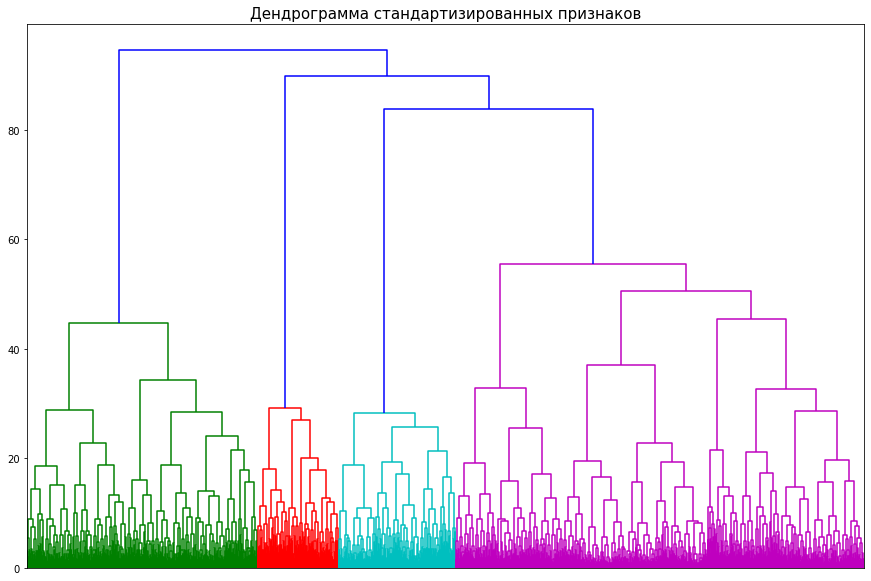

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма стандартизированных признаков', fontsize = 15)
plt.show()

---
**На основании полученного графика можно выделить 4 кластера**

**Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров примем n=5.**

In [34]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=42)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [35]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

In [36]:
gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
cluster_km,,,,,,,,,,,,
0,0.500000,0.000000,0.487500,0.075000,1.0,0.235714,28.719643,137.701147,2.837500,3.057143,1.769697,0.400000
1,0.505925,0.994531,0.951686,0.860529,1.0,0.516864,29.605287,155.900765,7.196901,4.418414,1.979657,0.116682
2,1.000000,1.000000,0.209163,0.074701,1.0,0.421315,29.085657,143.467288,2.984064,3.481076,1.898627,0.315737
3,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839
4,0.000000,1.000000,0.249738,0.057712,1.0,0.379853,29.030430,146.834854,3.239244,3.487933,1.816807,0.303253


In [37]:
gym['cluster_km'].value_counts()

1    1097
2    1004
4     953
0     560
3     386
Name: cluster_km, dtype: int64

---
Кластер клиентов `1` можно назвать самым лояльным - отток клиентов из этой группы составил `11.7%` Судя по средним показателям это люди, которые работают неподалеку, являются сотрудниками компаний-партнеров фитнес-центра. Большая часть представителей этой группы была привлечена в рамках акции "приведи друга". Вероятно, что эти клиенты и сами активно подтягивают своих друзей и знакомых. Также они отличаются тем, что покупают абонемент на год и посещают клуб чаще всех - в среднем почти 2 раза в неделю.

Клиентов, которые попали в кластер `0`, можно считать "группой риска". У них самый высокий показатель оттока - `40%`.  
Это клиенты, которым территориально клуб не очень удобен. Срок абонемента, который они покупают, не превышает 6 месяцев. У них самые низкие показатели по посещаемости клуба среди всех клиентов из других кластеров. Также можно отметить, что только 23.5% посещали групповые занятия. Выручка с этих клиентов от других услуг фитнес-центра в среднем ниже чем по остальным кластерам.

Стоит обратить внимание на кластеры `2` и `4`. Они интерсесны тем, что клиенты здесь сторого разбиты на мужчин и женщин. В остальном эти кластеры очень похожи. Эти клиенты работают или проживают в районе, где находится фитнес-центр, почти с одинаковой частотой посещают клуб. И показатель оттока у этих кластеров довольно высокий, более `30%`.

В кластере `3` отток клиентов составил `26,7%`. Самой главной отличительной особенностью этого кластера является то, что клиенты не предоставили свой контактный номер телефона. 

In [38]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

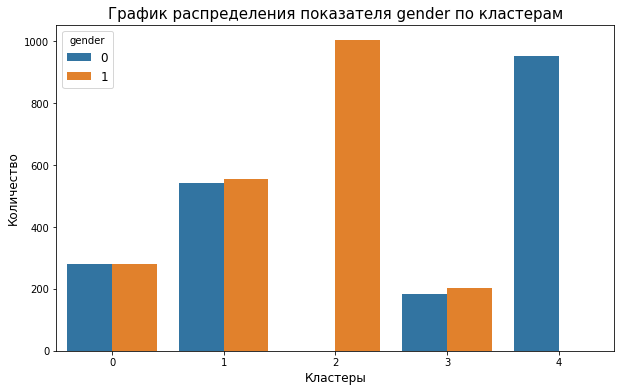

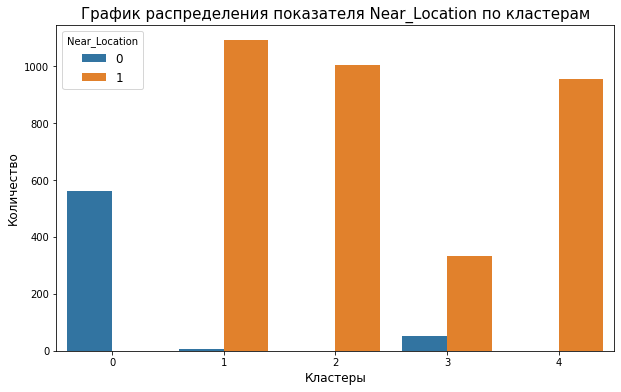

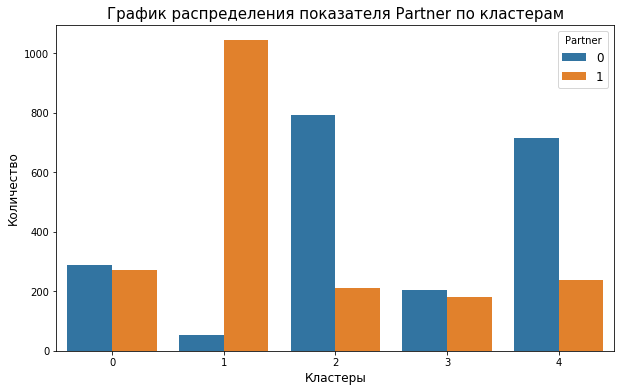

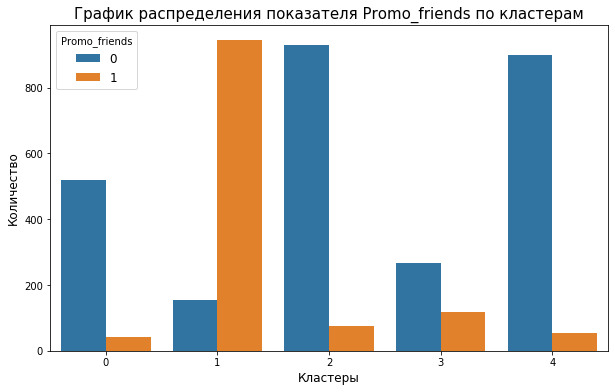

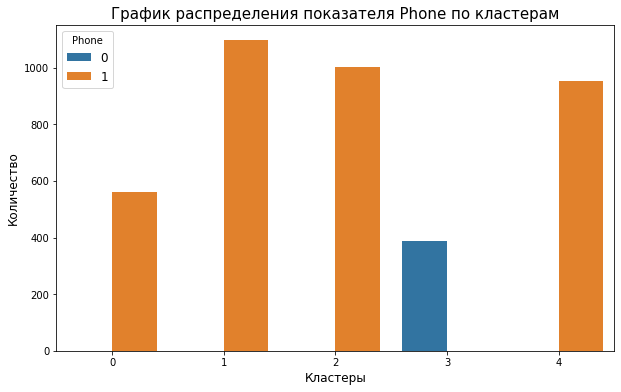

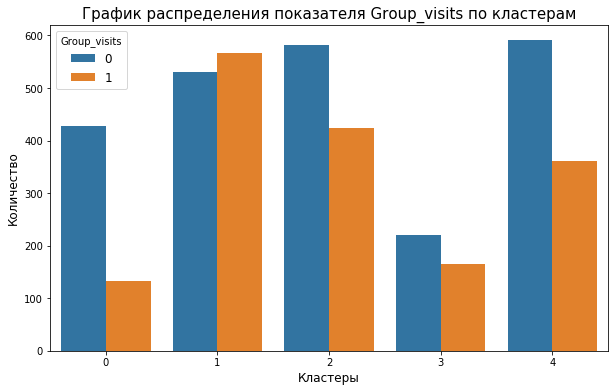

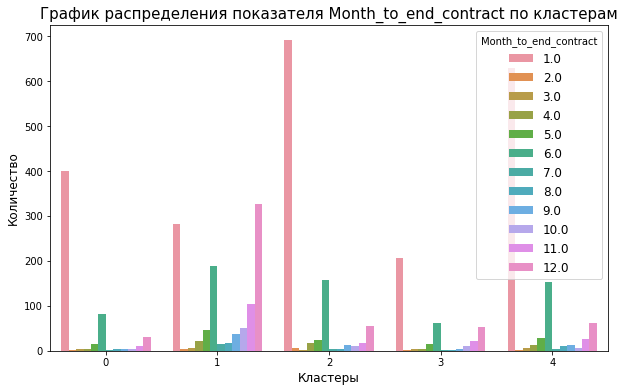

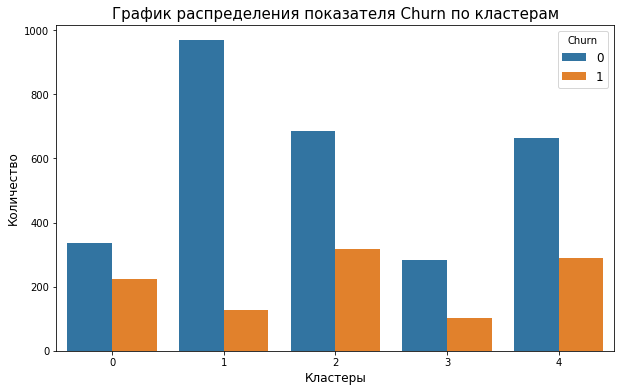

In [41]:
for i in gym[['gender', 'Near_Location', 'Partner', 
             'Promo_friends', 'Phone', 'Group_visits', 'Month_to_end_contract', 'Churn']].columns:
    if i != 'cluster_km':
        plt.figure(figsize=(10, 6))
        
        sns.countplot(x='cluster_km', hue=i, data=gym)
        
        plt.title('График распределения показателя ' + i + ' по кластерам', fontsize = 15)
        plt.ylabel('Количество', fontsize = 12)
        plt.xlabel('Кластеры' ,fontsize = 12)
        plt.legend(title=i, loc="best", fontsize = 12)
        
        plt.show()
        

**Данные графики также подтверждают выводы, сделанные ранее.**

In [42]:
gym.groupby('cluster_km')['Churn'].agg(['count', 'mean']).sort_values(by='mean', ascending = False)

,count,mean
cluster_km,,
0,560,0.400000
2,1004,0.315737
4,953,0.303253
3,386,0.266839
1,1097,0.116682


Безусловно кластеры отличаются по доле оттока. Более склонны к оттоку кластеры `0`, `2` и `4`. Более надежными можно назвать кластеры `3` и `1`.

<a id = "step5"></a>
## Шаг 5. Общий вывод по проекту
---
[1](#step1)  [2](#step2)   [3](#step3)   [4](#step5)   [Начало](#head)

В рамках проекта необходимо было провести анализ данных по клиентам сети фитнес-центров «Культурист-датасаентист» и  подготовить план действий по их удержанию.
В ходе работы:
- были построены модели для прогнозирования вероятности оттока (на уровне следующего месяца) для каждого клиента;
- сформированы типичные портреты пользователей;
- проанализированы основные признаки, наиболее сильно влияющие на отток.

---
При проведении **исследовательского анализа данных** мы узнали, что количество мужчин и женщин распределено практически одинаково. Большинство клиентов проживает или работает рядом с фитнес-центром. Практически половина занимающихся является сотрудниками компаний-партнёров клуба. Около 10% клиентов предпочли не сообщать номер своего мобильного телефона. Большинство заключило контаркт с фитнес-центром на 1 месяц. Посетители клуба - это люди в возрасте от 18 до 41 года. Большинство клиентов посещает ходит в фитнес-центр не более 3 месяцев. В текущем месяце выбыло 26,5% клиентов. 

На основе того же анализа мы установили, что попавшие в отток клиенты в среднем моложе, меньше тратили на дополнительные услуги и реже посещали клуб. Они стали клиентами фитнес-центра относительно недавно и изначально брали абонементы на небольшой срок. 

Нами были **построены модели бинарной классификации** двумя способами: логистической регрессией и случайным лесом. Доля правильных ответов у полученных моделей доволно высокая. Логистическая регрессия дает 88% правильных ответов, а модель случайного леса - 90%. Точность полученных моделей тоже на хорошем уровне. Доля прогнозов среди целевого класса в модели случайного леса выше: 80% против 76%. Показатель полноты для обеих моделей одинаковый. Это значит, что они смогли обнаружить одинаковое количество реальных объектов целевого класса. На основании полученных метрик модель случайного леса в целом показала себя лучше.

По итогам проведеня **кластеризации пользователей** получили следующие выводы:

> Кластер клиентов `1` можно назвать лояльным - отток клиентов из этой группы составил `11.7%` Судя по средним показателям это люди, которые работают неподалеку, являются сотрудниками компаний-партнеров фитнес-центра. Большая часть представителей этой группы была привлечена в рамках акции "приведи друга". Вероятно, что эти клиенты и сами привлекают своих друзей и знакомых. Также они отличаются тем, что покупают абонемент на год и посещают клуб в среднем почти 2 раза в неделю.

> Клиентов, которые попали в кластер `0`, можно считать "группой риска". У них самый высокий показатель оттока - `40%`.  Это клиенты, которым территориально клуб не очень удобен. Срок абонемента, который они покупают, не превышает 6 месяцев. У них самые низкие показатели по посещаемости клуба среди всех клиентов из других кластеров. Также можно отметить, что только 23.5% посещали групповые занятия. Выручка с этих клиентов от других услуг фитнес-центра в среднем ниже чем по остальным кластерам.

> Стоит обратить внимание на кластеры `2` и `4`. Они интерсесны тем, что клиенты здесь сторого разбиты на мужчин и женщин. В остальном эти кластеры очень похожи. Эти клиенты работают или проживают в районе, где находится фитнес-центр, почти с одинаковой частотой посещают клуб. И показатель оттока у этих кластеров довольно высокий, более `30%`.

>В кластере `3` отток клиентов составил `26,7%`. Самой главной отличительной особенностью этого кластера является то, что клиенты не предоставили свой контактный номер телефона. 

**Рекомендации для стратегии взаимодействия с пользователями и их удержания:**

1. Продолжать акцию по привличению клиентов среди знакомых. Можно придумать какие-нибудь дополнительные выгодные условия. Клиенты, которых привели друзья, более склонны покупать абонементы на долее долгий срок. 
2. Разработать специальные предложения, чтобы побудить клиентов покупать абонементы сразу на 12 месяцев. В группах клиентов, где присутсуют только мужчины и только женщины очень высокая доля тех, кто покупает помесячный абонемент. Если предложить им более выгодные условия, они могут купить абонементы сразу на год.  
3. Клиенты из кластеров `2` и `4` не очень активно посещают групповые занятия. Возможно стоит провести опрос среди клиентов, чтобы узнать каких активностей не достает в клубе. Или можно сразу перейти к разработке новых программ. 
4. Продолжать работу в корпоративном секторе. Оттуда приходят хорошие клиенты.